# Darcy's Law: Flow Through Conical Soil Columns

This assignment will test:

1. Discharge calculations for variable cross-sections
2. Hydraulic and pressure head distributions
3. Finding maximum pressure analytically and numerically
4. Sensitivity analyses
5. Implementing numerical ODE solvers (Euler's method and built in solvers)
6. Comparing numerical and analytical solutions

## Problem Statement

We are analyzing **steady-state flow** through a conical soil column where the radius varies linearly with elevation:

$$x(z) = a + bz$$

where:
- $x(z)$ = radius at elevation $z$ (m)
- $a$ = radius at bottom (m)
- $b$ = rate of radius increase (m/m)
- $z$ = elevation from bottom (m)

### Darcy's Law in Cylindrical Coordinates

For steady flow with velocity $V = K \frac{dH}{dz}$ through circular cross-section $A = \pi x^2$:

$$Q = V \cdot A = \pi x^2 K \frac{dH}{dz} = \pi (a+bz)^2 K \frac{dH}{dz}$$

In [18]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.integrate import odeint
import math #i added this


# Set up plotting style
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## Problem Parameters
Nothing for you to do here.

In [19]:
# Geometric parameters
a = 0.05        # Bottom radius (m)
b = 0.25        # Rate of radius increase (m/m)
z_height = 1.0  # Column height (m)
pi = 3.141592653589793

# Hydraulic parameters
K = 5.0         # Hydraulic conductivity (m/day)
H_top = 1.1     # Head at top (m)
H_bottom = 0.0  # Head at bottom (m)

# Calculate top radius
r_top = a + b * z_height

print(f"Conical Column Properties:")
print(f"  Bottom radius: {a} m")
print(f"  Top radius: {r_top} m")
print(f"  Height: {z_height} m")
print(f"  Hydraulic conductivity: {K} m/day")
print(f"  Head difference: {H_top - H_bottom} m")

Conical Column Properties:
  Bottom radius: 0.05 m
  Top radius: 0.3 m
  Height: 1.0 m
  Hydraulic conductivity: 5.0 m/day
  Head difference: 1.1 m


---

# Exercise 1: Single-Layer Conical Column

## Exercise 1a: Calculate discharge

In [20]:
def calculate_discharge_single_layer(a, b, K, H_top, z_height):
    """
    Calculate discharge through single-layer conical column.
    
    From integration: Q = pi * K * H_top * a * (a + b*z_height)
    """
    Q = pi * K * H_top * a * (a + b * z_height) #✔ TODO: Replace None with the correct formula
    return Q

# Test the function
Q = calculate_discharge_single_layer(a,b,K,H_top,z_height) #✔ TODO: Replace None with the correct function call
print(f"Discharge Q = {Q:.4f} m3/day")

Discharge Q = 0.2592 m3/day


## Exercise 1b: Hydraulic head distribution

In [21]:
def hydraulic_head_single_layer(z, Q, a, b, K):
    """
    Calculate hydraulic head at elevation z.
    
    H(z) = (Q/(pi*K)) * [z/(a*(a+bz))]
    """
    
    H = (Q/(pi*K)) * (z/(a*(a+b*z))) #✔ TODO: Replace None with the correct formula

    return H

# Test the function for a range of z values from 0 to 1 with dx of 0.25
z_test = np.linspace(0,1,11) #✔ TODO: Replace None with the correct numpy array
H_test = hydraulic_head_single_layer(z_test,Q,a,b,K) #✔ TODO: Replace None with the correct function call

print("Elevation (m) | Head (m)")
print("-" * 25)
for z_val, h_val in zip(z_test, H_test): # Note: zip combines two lists element-wise
    print(f"{z_val:8.2f}      | {h_val:.4f}")

Elevation (m) | Head (m)
-------------------------
    0.00      | 0.0000
    0.10      | 0.4400
    0.20      | 0.6600
    0.30      | 0.7920
    0.40      | 0.8800
    0.50      | 0.9429
    0.60      | 0.9900
    0.70      | 1.0267
    0.80      | 1.0560
    0.90      | 1.0800
    1.00      | 1.1000


## Exercise 1c: Pressure head

In [22]:
def pressure_head_single_layer(z, Q, a, b, K):
    """
    Calculate pressure head at elevation z.
    Note: You will have to use the hydraulic head function here.
    
    Pressure head = Hydraulic head - Elevation head
    """
    p_head = hydraulic_head_single_layer(z, Q, a, b, K) - z #✔ TODO: Replace None with the correct formula
    return p_head

# Use these arrays for plotting in the next cell
z_array = np.linspace(0, 1.0, 100)
H_array = hydraulic_head_single_layer(z_array, Q, a, b, K)
p_array = pressure_head_single_layer(z_array, Q, a, b, K)

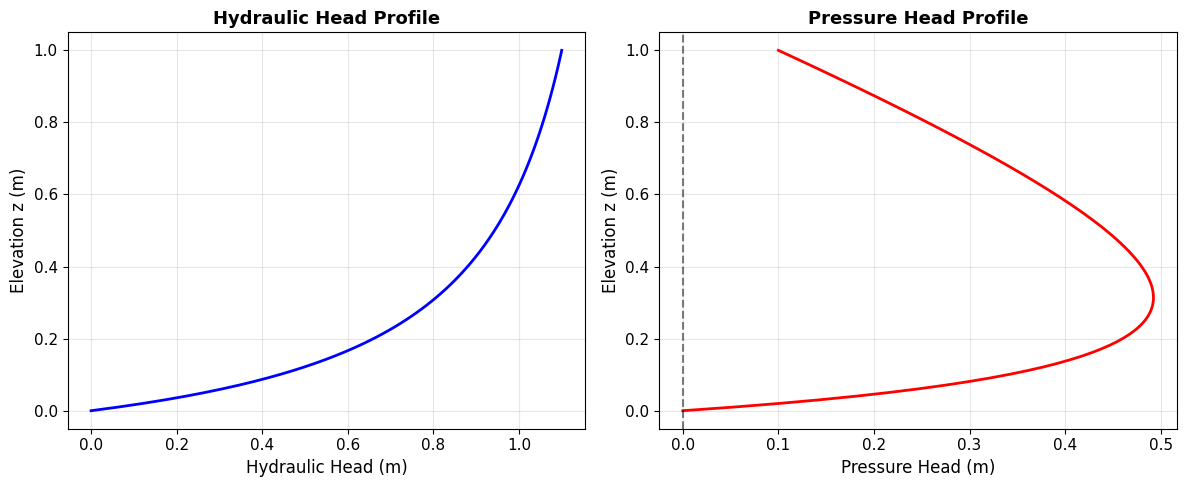

In [23]:
# Plotting the results - nothing for you to change here, but you need to complete the functions above
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(H_array, z_array, 'b-', linewidth=2)
ax1.set_xlabel('Hydraulic Head (m)', fontsize=12)
ax1.set_ylabel('Elevation z (m)', fontsize=12)
ax1.set_title('Hydraulic Head Profile', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(p_array, z_array, 'r-', linewidth=2)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('Pressure Head (m)', fontsize=12)
ax2.set_ylabel('Elevation z (m)', fontsize=12)
ax2.set_title('Pressure Head Profile', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# Exercise 2: Finding Maximum Pressure

## Exercise 2a: Analytical solution

In [24]:
def find_max_pressure_analytical(a, b, Q, K):
    """
    Find maximum pressure location analytically using quadratic formula.
    
    Quadratic: b^2 * z^2 + 2abz + (a² - Q/(pi * K)) = 0
    """
    # Coefficients of quadratic equation Az^2 + Bz + C = 0
    A = b**2
    B = 2 * a * b
    C = a**2 - Q / (np.pi * K)

    z_max = (-B + math.sqrt((B**2)-(4*A*C)))/(2*A) #✔ TODO: Replace None with the correct formula using quadratic formula
    p_max = hydraulic_head_single_layer(z_max, Q, a, b, K) - z_max #✔ TODO: Replace None with the correct function call
    
    return z_max, p_max

# Test the function
z_max_ana, p_max_ana = find_max_pressure_analytical(a, b, Q, K)
print(f"Analytical Solution:")
print(f"  Location: z_max = {z_max_ana:.4f} m")
print(f"  Maximum pressure: p_max = {p_max_ana:.4f} m")

Analytical Solution:
  Location: z_max = 0.3138 m
  Maximum pressure: p_max = 0.4924 m


## Exercise 2b: Numerical optimization

In [25]:
def objective(z, a=a, b=b, Q=Q, K=K):
    """
    Define objective function (use the negative pressure to find the maximum)
    """
    return -pressure_head_single_layer(z, Q, a, b, K) #✔ TODO: Replace None with the correct formula
 

def find_max_pressure_numerical(a, b, Q, K, z_range=(0, 1)):
    """
    Find maximum pressure using numerical optimization.
    
    Minimize negative pressure to find maximum.
    Note: Nothing for you to do here, but you need to have the "objective" 
          function defined and working above.
    """
   
    # Use minimize_scalar with bounded method
    result = minimize_scalar(objective, bounds=z_range, method='bounded')
    
    # Extract results - nothing to do here, but note how it works!
    z_max = result.x
    p_max = -result.fun  # Negate back to get maximum
    
    return z_max, p_max


In [26]:
# Test and compare
z_max_num, p_max_num = find_max_pressure_numerical(a, b, Q, K)
print(f"Numerical Solution:")
print(f"  Location: z_max = {z_max_num:.4f} m")
print(f"  Maximum pressure: p_max = {p_max_num:.4f} m")
print(f"\nDifference from analytical:")
print(f"  dz = {abs(z_max_ana - z_max_num):.6f} m")
print(f"  dp = {abs(p_max_ana - p_max_num):.6f} m")

Numerical Solution:
  Location: z_max = 0.3138 m
  Maximum pressure: p_max = 0.4924 m

Difference from analytical:
  dz = 0.000000 m
  dp = 0.000000 m


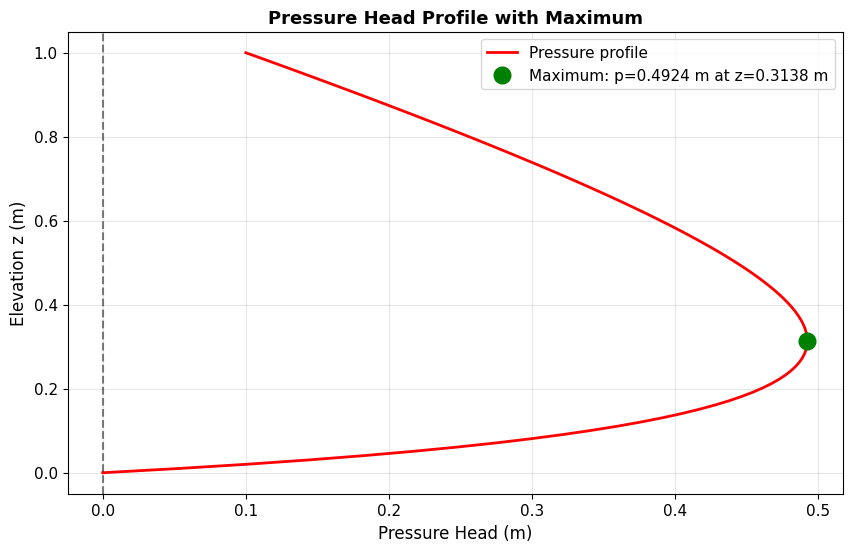

In [27]:
# Visualize maximum on pressure profile - nothing to change here
# but you need to complete the functions above, you should be able to 
# see the maximum point on the pressure profile plot to confirm your solution
plt.figure(figsize=(10, 6))
plt.plot(p_array, z_array, 'r-', linewidth=2, label='Pressure profile')
plt.plot(p_max_ana, z_max_ana, 'go', markersize=12, 
         label=f'Maximum: p={p_max_ana:.4f} m at z={z_max_ana:.4f} m')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Pressure Head (m)', fontsize=12)
plt.ylabel('Elevation z (m)', fontsize=12)
plt.title('Pressure Head Profile with Maximum', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

# Exercise 3: Sensitivity Analysis

In this exercise, you will analyze how the maximum pressure head and its location change with variations in the parameters $a$ and $b$. This will help you understand the influence of the column's geometry on the pressure distribution, as well as checking your understanding of using nested loops and storing results in arrays.

In [28]:
# SOLUTION
a_values = np.linspace(0.02, 0.10, 30)
b_values = np.linspace(0.10, 0.50, 30)

# This creates a grid of (a, b) pairs
A, B = np.meshgrid(a_values, b_values)

# Calculate Q for each combination
Q_matrix = np.zeros_like(A)

#✔ TODO: Need to loop through each (a, b) pair to compute Q, and store in Q_matrix

for a_index,a_value in enumerate(a_values):
    for b_index,b_value in enumerate(b_values):
        Q_matrix[a_index,b_index] = calculate_discharge_single_layer(a_value, b_value, K, H_top, z_height)

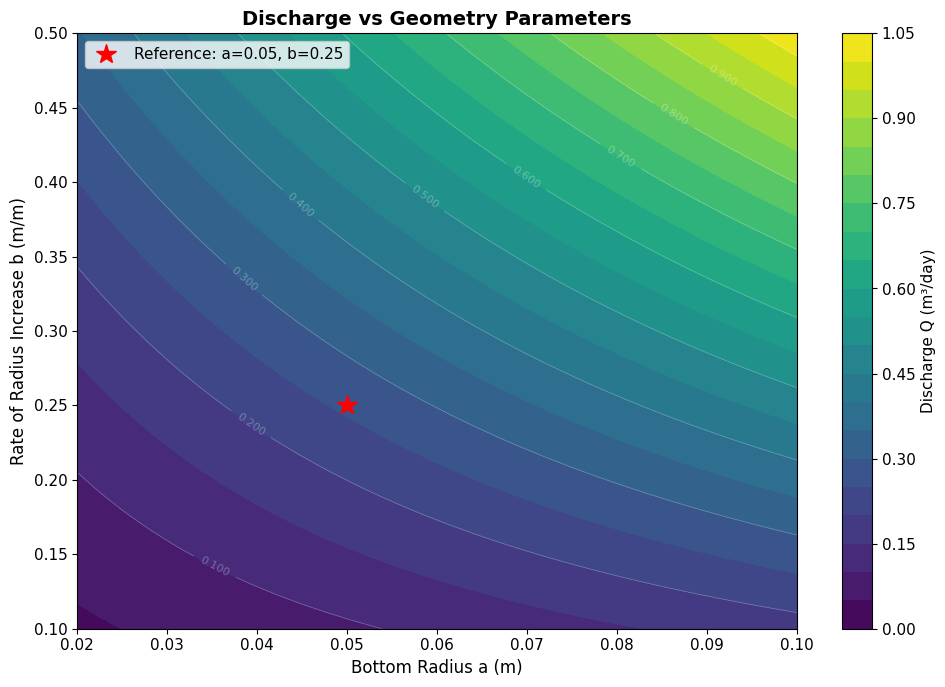

In [29]:
# Create contour plot - nothing to change here, but you need to have the Q_matrix calculated above
plt.figure(figsize=(10, 7))
contour = plt.contourf(A, B, Q_matrix, levels=20, cmap='viridis')
cbar = plt.colorbar(contour, label='Discharge Q (m³/day)')
plt.xlabel('Bottom Radius a (m)', fontsize=12)
plt.ylabel('Rate of Radius Increase b (m/m)', fontsize=12)
plt.title('Discharge vs Geometry Parameters', fontsize=14, fontweight='bold')

# Add reference point
plt.plot(a, b, 'r*', markersize=15, label=f'Reference: a={a}, b={b}')
plt.legend()

# Add contour lines
CS = plt.contour(A, B, Q_matrix, levels=10, colors='white', alpha=0.3, linewidths=0.5)
plt.clabel(CS, inline=True, fontsize=8, fmt='%.3f')

plt.tight_layout()
plt.show()

---

# Exercise 4: Implement Your Own ODE Solver

In this exercise, you will implement **Euler's method** to solve the ODE:

$$\frac{dH}{dz} = \frac{Q}{\pi (a+bz)^2 K}$$

with initial condition $H(0) = 0$.

## Background

### Euler's Method
Forward Euler is the simplest numerical method:
$$H_{i+1} = H_i + \Delta z \cdot f(z_i, H_i)$$

In [30]:
# Define the ODE right-hand side
def dH_dz_func(z, H, a=a, b=b, K=K, Q=Q):
    """RHS of ODE: dH/dz = Q / [pi(a+bz)^2 K]"""
    return Q / (pi*((a+b*z)**2)*K) #✔ TODO: Replace None with the correct formula

# Euler's method implementation - note the inclusion of a function as input!!
def euler_method(f, z0, H0, z_end, num_steps):
    """
    Solve ODE dH/dz = f(z, H) using Euler's method.
    
    Parameters:
    -----------
    f : function 
        Right-hand side of ODE: f(z, H) = dH/dz
    z0 : float
        Initial elevation (m)
    H0 : float
        Initial hydraulic head (m)
    z_end : float
        Final elevation (m)
    num_steps : int
        Number of steps
        
    Returns:
    --------
    z_values : array
        Array of z positions
    H_values : array
        Array of H values at each z
    """
    #✔ TODO: Calculate step size using z_end, z0, and num_steps
    dz = (z_end - z0)/(num_steps)
    
    # Initialize arrays
    z_values = np.zeros(num_steps + 1)
    H_values = np.zeros(num_steps + 1)

    #✔ TODO: Set initial conditions
    z_values[0] = z0
    H_values[0] = H0
    
    
    # Euler's method iteration
    for i in range(num_steps):
        # Forward Euler step: H_{i+1} = H_i + dz * f(z_i, H_i)
        H_values[i+1] = H_values[i] + dz * f(z_values[i],H_values[i])
        z_values[i+1] = z_values[i] + dz
                                    
        #continue #✔ TODO: REMOVE ME & replace with correct implementation
    
    return z_values, H_values

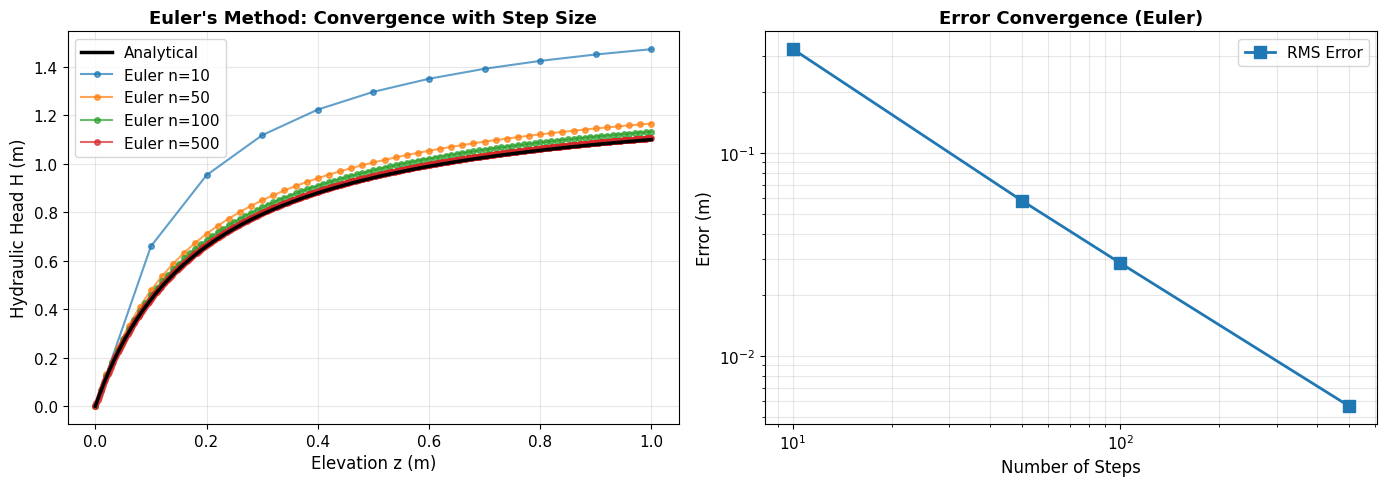

In [31]:
# Test with different step sizes - Nothing for you to change here, but you need to have the 
# euler_method and dH_dz_func defined and working from the previous cells
step_counts = [10, 50, 100, 500]
plt.figure(figsize=(14, 5))

# Left plot: Solutions
plt.subplot(1, 2, 1)
z_analytical = np.linspace(0, 1, 500)
H_analytical = hydraulic_head_single_layer(z_analytical, Q, a, b, K)
plt.plot(z_analytical, H_analytical, 'k-', linewidth=2.5, label='Analytical', zorder=10)

for n_steps in step_counts:
    z_euler, H_euler = euler_method(dH_dz_func, 0, 0, 1.0, n_steps)
    plt.plot(z_euler, H_euler, 'o-', linewidth=1.5, markersize=4, 
             label=f'Euler n={n_steps}', alpha=0.7)

plt.xlabel('Elevation z (m)', fontsize=12)
plt.ylabel('Hydraulic Head H (m)', fontsize=12)
plt.title("Euler's Method: Convergence with Step Size", fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Right plot: Error analysis
plt.subplot(1, 2, 2)
errors_max = []
errors_rms = []
for n_steps in step_counts:
    z_euler, H_euler = euler_method(dH_dz_func, 0, 0, 1.0, n_steps)
    H_ana_interp = hydraulic_head_single_layer(z_euler, Q, a, b, K)
    error = np.abs(H_euler - H_ana_interp)
    errors_rms.append(np.sqrt(np.mean(error**2)))

plt.loglog(step_counts, errors_rms, 's-', linewidth=2, markersize=8, label='RMS Error')

# Add reference line for first-order convergence
plt.xlabel('Number of Steps', fontsize=12)
plt.ylabel('Error (m)', fontsize=12)
plt.title('Error Convergence (Euler)', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

---

# Exercise 5: Numerical ODE Solution using `scipy.integrate.odeint`

Here I want you to use the built-in `odeint` function from `scipy.integrate` to solve the same ODE as in Exercise 6, and then compare your results with the analytical solution. The goal of this exercise is for you to learn how to use a standard library function for solving ODEs, which is often more efficient and accurate than simple methods that you might implement yourself. It is also a test of your ability to read documentation and apply it to a specific problem.

In [ ]:
def dH_dz_func(z, H, a=a, b=b, K=K, Q=Q):
    return Q / (pi*((a+b*z)**2)*K) # copied from Background

def solve_ode_numerically(z_span=(0, 1), num_points=10):
    """
    Solve dH/dz = Q / [pi(a+bz)^2 K] numerically using odeint.
    """
    # Create z array
    z_array = np.linspace(0, 1, 10) #✔ TODO: Replace None with the correct numpy array
   
    # Solve with initial condition H(0) = 0
    H0 = 0
    H_numerical = odeint(dH_dz_func, H0, z_array, tfirst=True) #✔ TODO: Replace None with the correct function call to "odeint"
    #tfirst changes the order that odeint expects arguments to be passed from (y,t) to (t,y)
    
    return z_array, H_numerical.flatten() # flatten makes the resulting array 1D


# This will call your function to test it - for fun, try different values of num_points
# and see how the error changes compared to the Euler method you implemented above
num_points = 100
z_array, H_numerical = solve_ode_numerically(z_span=(0, 1), num_points=num_points)

# Get analytical solution for comparison
H_analytical = hydraulic_head_single_layer(z_array, Q, a, b, K)

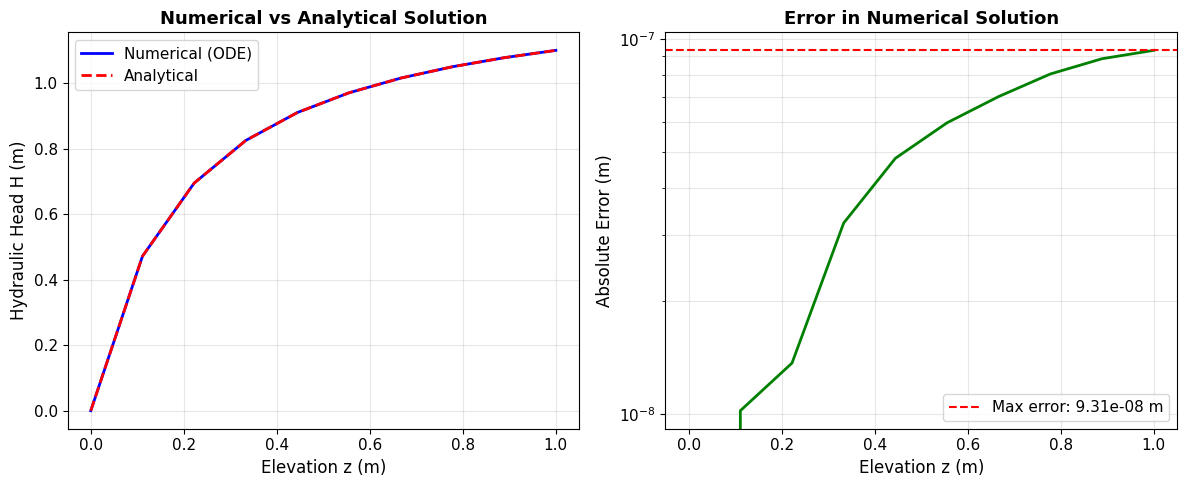


Numerical ODE Solution Statistics:
  Number of points: 100
  Maximum error: 9.308685e-08 m
  RMS error: 5.923651e-08 m


In [38]:
# Calculate error
error = abs(H_numerical - H_analytical) # TODO: calculate the absolute error array
max_error = np.amax(error) # TODO: calculate the maximum error
rms_error = np.sqrt(np.mean(error**2)) # TODO: calculate the root mean square error


# Plot comparison - nothing to change from here on out, but you need to have the
# solve_ode_numerically function defined and working above
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Solutions
ax1.plot(z_array, H_numerical, 'b-', linewidth=2, label='Numerical (ODE)')
ax1.plot(z_array, H_analytical, 'r--', linewidth=2, label='Analytical')
ax1.set_xlabel('Elevation z (m)', fontsize=12)
ax1.set_ylabel('Hydraulic Head H (m)', fontsize=12)
ax1.set_title('Numerical vs Analytical Solution', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Error
ax2.semilogy(z_array, error, 'g-', linewidth=2)
ax2.axhline(y=max_error, color='r', linestyle='--', 
            label=f'Max error: {max_error:.2e} m')
ax2.set_xlabel('Elevation z (m)', fontsize=12)
ax2.set_ylabel('Absolute Error (m)', fontsize=12)
ax2.set_title('Error in Numerical Solution', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print(f"\nNumerical ODE Solution Statistics:")
print(f"  Number of points: {num_points}")
print(f"  Maximum error: {max_error:.6e} m")
print(f"  RMS error: {rms_error:.6e} m")

# Exercise 6: Compare Numerical and Analytical Solutions

Your task is to compare the numerical solution from your Euler's method implementation and the `odeint` solution with the analytical solution for the hydraulic head distribution. Make a figure that shows both solutions on the same plot for a given set of parameters. Use N=100 steps for the numerical solution and the parameters used in the prior steps. This last step is open ended and you can choose how to present the results.

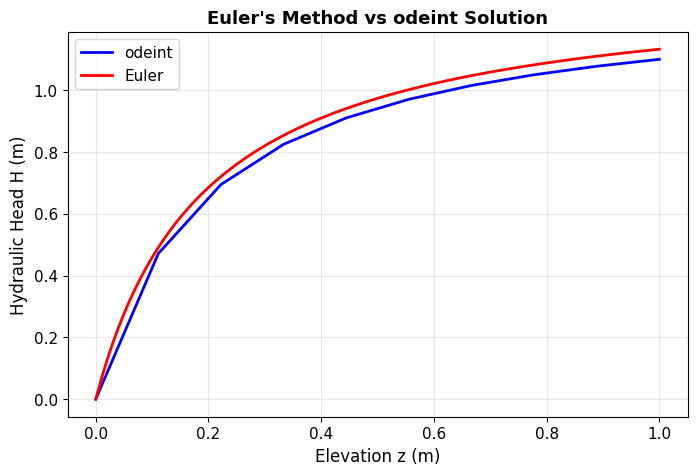

In [40]:
# TODO: Your solution here

num_points = 100

z_array, H_numerical = solve_ode_numerically(z_span=(0, 1), num_points=num_points) # from exercise 5
z_euler, H_euler = euler_method(dH_dz_func, 0, 0, 1.0, num_steps=num_points) # from exercise 4

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(z_array, H_numerical, 'b-', linewidth=2, label='odeint')
ax1.plot(z_euler, H_euler, 'r-', linewidth=2, label='Euler')
ax1.set_xlabel('Elevation z (m)', fontsize=12)
ax1.set_ylabel('Hydraulic Head H (m)', fontsize=12)
ax1.set_title("Euler's Method vs odeint Solution", fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)